## **TP réalisé par** :
- Kpodjro KPATOUKPA
- Orchelle Patricia WELEHELA TAWEUTEU

# **Installation des packages nécessaires**

In [1]:
install.packages("miic")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ppcor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("bnlearn")
# Installe le package nécessaire pour gérer les packages Bioconductor
install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Installation des dépendances Bioconductor (graph et RBGL)
BiocManager::install(c("graph", "RBGL", "ggm"), update = FALSE, ask = FALSE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'graph', 'RBGL', 'ggm'

also installing the dependencies ‘BiocGenerics’, ‘BH’




In [7]:
# Installe le package pcalg
install.packages("pcalg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# Chargement des librairies R nécessaires
library(bnlearn)
library(miic)
library(pcalg)


Attaching package: ‘pcalg’


The following objects are masked from ‘package:bnlearn’:

    dsep, pdag2dag, shd, skeleton




In [9]:
library(igraph)

In [56]:
# Installation le package qgraph
install.packages("qgraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘mnormt’, ‘GPArotation’, ‘pbivnorm’, ‘numDeriv’, ‘quadprog’, ‘gridExtra’, ‘htmlTable’, ‘Formula’, ‘psych’, ‘lavaan’, ‘plyr’, ‘Hmisc’, ‘jpeg’, ‘png’, ‘reshape2’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘pbapply’




In [57]:
library(qgraph)

# **Etape 2. Constraint-based method (PC)**

## **1. From the package MIIC, load the cosmicCancer data using the function dat ().**
Explore the dataset content, variables and dimensions.

In [10]:
# Chargement des données COSMIC Cancer incluses dans MIIC
data("cosmicCancer")

### **Exploration du contenu du dataset**

In [11]:
# Vérification de la structure de l'objet
str(cosmicCancer)


'data.frame':	807 obs. of  176 variables:
 $ bbc3    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ egln1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ tgfb3   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ esm1    : Factor w/ 1 level "n": 1 1 1 1 1 1 1 1 1 1 ...
 $ igfbp5  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ fgf18   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ scube2  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ wisp1   : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ flt1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ hrasls  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ stk32b  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ rassf7  : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ dck     : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ melk    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 1 1 1 1 ...
 $ ext1    : Factor w/ 2 levels "n","y": 1 1 1 1 1 1 

In [12]:
# Affichage des premières lignes pour voir les variables
head(cosmicCancer)

,bbc3,egln1,tgfb3,esm1,igfbp5,fgf18,scube2,wisp1,flt1,hrasls,⋯,PPP2R2A,CCNE1,PTEN,MDM2,USP7,UBE3A,PLK1,BAX,MET,Ploidy
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
2,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
3,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,2
4,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
5,n,n,n,n,n,n,n,n,n,n,⋯,normal,normal,normal,normal,normal,normal,normal,normal,normal,1
6,n,n,n,n,n,n,n,n,n,n,⋯,under,normal,normal,normal,over,normal,normal,normal,normal,2


In [13]:

# Vérification des dimensions (nombre de lignes = échantillons, nombre de colonnes = variables)
dim(cosmicCancer)

[1] 807 176

In [14]:
# Affichage du nom des variables
colnames(cosmicCancer)

[1] "bbc3"     "egln1"    "tgfb3"    "esm1"     "igfbp5"   "fgf18"   
  [7] "scube2"   "wisp1"    "flt1"     "hrasls"   "stk32b"   "rassf7"  
 [13] "dck"      "melk"     "ext1"     "gnaz"     "ebf4"     "mtdh"    
 [19] "pitrm1"   "qscn6l1"  "ccne2"    "ect2"     "cenpa"    "lin9"    
 [25] "kntc2"    "mcm6"     "nusap1"   "orc6l"    "tspyl5"   "rundc1"  
 [31] "prc1"     "rfc4"     "recql5"   "cdca7"    "dtl"      "col4a2"  
 [37] "gpr180"   "mmp9"     "gpr126"   "rtn4rl1"  "diaph3"   "cdc42bpa"
 [43] "palm2"    "aldh4a1"  "aytl2"    "oxct1"    "peci"     "gmps"    
 [49] "gstm3"    "slc2a3"   "foxm1"    "erbb2"    "esr1"     "tp53"    
 [55] "rb1"      "myc"      "jun"      "cdkn2a"   "bcl2"     "tp73"    
 [61] "lats2"    "mapk14"   "cdkn1a"   "chek1"    "aurkb"    "aurka"   
 [67] "brca1"    "brca2"    "dusp5"    "mst1"     "ppp1r13l" "birc3"   
 [73] "tgfa"     "ets1"     "ets2"     "hif1a"    "ldha"     "foxo1"   
 [79] "ndrg1"    "ppp2r1a"  "ppp2r2a"  "ccne1"    "apobec3b" "pten"    
 [85] "mdm2"     "usp7"     "ube3a"    "spdye7p"  "plk1"     "bax"     
 [91] "met"      "BBC3"     "EGLN1"    "TGFB3"    "ESM1"     "IGFBP5"  
 [97] "FGF18"    "SCUBE2"   "WISP1"    "FLT1"     "HRASLS"   "STK32B"  
[103] "RASSF7"   "DCK"      "MELK"     "EXT1"     "GNAZ"     "MTDH"    
[109] "PITRM1"   "CCNE2"    "ECT2"     "CENPA"    "LIN9"     "MCM6"    
[115] "NUSAP1"   "TSPYL5"   "RUNDC1"   "PRC1"     "RFC4"     "RECQL5"  
[121] "CDCA7"    "DTL"      "COL4A2"   "GPR180"   "MMP9"     "GPR126"  
[127] "RTN4RL1"  "DIAPH3"   "CDC42BPA" "PALM2"    "ALDH4A1"  "OXCT1"   
[133] "GMPS"     "GSTM3"    "SLC2A3"   "ERBB2"    "ESR1"     "TP53"    
[139] "RB1"      "MYC"      "JUN"      "CDKN2A"   "BCL2"     "FOXM1"   
[145] "BRCA1"    "TP73"     "LATS2"    "MAPK14"   "CDKN1A"   "CHEK1"   
[151] "BRCA2"    "AURKB"    "AURKA"    "APOBEC3B" "DUSP5"    "MST1"    
[157] "PPP1R13L" "BIRC3"    "TGFA"     "ETS1"     "ETS2"     "HIF1A"   
[163] "LDHA"     "FOXO1"    "NDRG1"    "PPP2R1A"  "PPP2R2A"  "CCNE1"   
[169] "PTEN"     "MDM2"     "USP7"     "UBE3A"    "PLK1"     "BAX"     
[175] "MET"      "Ploidy"

## **2. Call the PC approach from the pcalg package and identify the issues related to the observational data if any. Propose a way to resolve them.**
    NB: Follow the example given in the documentation to call PC. Use the ’disc’ independence test.

In [32]:
# Reconstruction du réseau avec PC (pcalg::pc)
df_num <- data.matrix(cosmicCancer)

n_levels <- apply(df_num, 2, max)

In [33]:
dim(df_num)

[1] 807 176

In [34]:
print(n_levels)

    bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       2        2        2        1        2        2        2        2 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       2        2        2        2        2        2        2        2 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       1        2        2        1        2        2        1        2 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       1        2        2        1        2        2        2        2 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       2        2        2        2        2        2        2        2 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       2        2        2        2        1        2        1        2 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       2        2        2        2        2       

In [35]:
suffStat <- list(dm = df_num, nlev = n_levels, adaptDF = FALSE)

In [29]:
?"pc"

In [36]:
# alpha = 0.01 : C'est le seuil de risque (1%).
pc_fit <- pc(suffStat,
             indepTest = disCItest, ## Test d'indépendance conditionnelle discret
             alpha = 0.03,
             labels = colnames(df_num),
             verbose = FALSE)

# Affichage du résultat brut
print("Résultat de l'algo PC :")
print(pc_fit)

ERROR: Error in if (any(as.integer(dm) != dm)) stop("'dm' must be discrete, with values in {0,1,..}"): missing value where TRUE/FALSE needed


## **Erreurs obtenues**
* Error in if (any(as.integer(dm) != dm)) stop("'dm' must be discrete, with values in {0,1,..}"): missing value where TRUE/FALSE needed;
* Variables mixtes;
* Des colonnes constantes;
* Présence données manquantes;
* Taille de l’échantillon vs nombre de variables :

    807 échantillons × 91 gènes → tests conditionnels peuvent manquer de puissance.


## **Proposition de solutions**

* Imputation ou suppression des lignes/colonnes manquantes.
* Réduction du nombre de variables ou combinaison des catégories peu fréquentes
* Convertir en entiers consécutifs à partir de 0

# **3. Remove the samples for which at least one variable has a NA value. Use the function complete.cases() to perform this action.**

## **3.1 Suppression des échantillons contenant au moins un NA**

In [37]:
# Vérifier quelles lignes sont complètes
good_rows <- complete.cases(cosmicCancer)

In [67]:
# Nombre total d'échantillons
n_total <- nrow(cosmicCancer)
cat("Nombre total d'échantillons : ",n_total)
# Nombre d'échantillons complets
n_complete <- sum(good_rows)
cat("\nNombre d'échantillons complets : ", n_complete)
# Nombre supprimé
n_removed <- n_total - n_complete
cat("\nNombre supprimé : ", n_removed)
# Proportion supprimée ("What proportion of the dataset did you remove? ")
prop_removed <- n_removed / n_total * 100
cat("\nProportion d'échantillons supprimés :", round(prop_removed, 2), "%\n")


Nombre total d'échantillons :  807
Nombre d'échantillons complets :  799
Nombre supprimé :  8
Proportion d'échantillons supprimés : 0.99 %


## **Quelles variables contiennent des NA ?**

In [47]:
# What are the concerned variables?
print(colSums(is.na(cosmicCancer)))

    bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       0        0        0        0        0        0        0        0 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       0        0        0        0        0        0        0        0 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       0        0        0        0        0        0        0        0 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       0        0        0        0        0        0        0        0 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       0        0        0        0        0        0        0        0 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       0        0        0        0        0        0        0        0 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       0        0        0        0        0       

## **Remarque**
On remarque que seule la colonne `Ploidy` contient des NA.
Nous avons au total 8 lignes contenant des valeurs manquantes.

## **Supprimer les lignes comportant des NA (incomplètes)**

In [48]:
cosmicClean <- cosmicCancer[complete.cases(cosmicCancer), ]


In [50]:
print(colSums(is.na(cosmicClean)))


    bbc3    egln1    tgfb3     esm1   igfbp5    fgf18   scube2    wisp1 
       0        0        0        0        0        0        0        0 
    flt1   hrasls   stk32b   rassf7      dck     melk     ext1     gnaz 
       0        0        0        0        0        0        0        0 
    ebf4     mtdh   pitrm1  qscn6l1    ccne2     ect2    cenpa     lin9 
       0        0        0        0        0        0        0        0 
   kntc2     mcm6   nusap1    orc6l   tspyl5   rundc1     prc1     rfc4 
       0        0        0        0        0        0        0        0 
  recql5    cdca7      dtl   col4a2   gpr180     mmp9   gpr126  rtn4rl1 
       0        0        0        0        0        0        0        0 
  diaph3 cdc42bpa    palm2  aldh4a1    aytl2    oxct1     peci     gmps 
       0        0        0        0        0        0        0        0 
   gstm3   slc2a3    foxm1    erbb2     esr1     tp53      rb1      myc 
       0        0        0        0        0       

### **Constat**
Nous n'avons de valeurs manquantes.

## **Conversion de Ploidy en factor**

In [52]:
cosmicClean$Ploidy <- factor(cosmicClean$Ploidy)

## **Retrait les colonnes constantes**

In [53]:
constant_cols <- names(cosmicClean)[sapply(cosmicClean, function(x) length(unique(x)) < 2)]
cosmicClean <- cosmicClean[, !(names(cosmicClean) %in% constant_cols)]


## **Conversion de tous les facteurs en niveaux numériques commençant à 0**

In [54]:
cosmicClean <- as.data.frame(lapply(cosmicClean, function(x) {
  if (is.factor(x)) return(as.integer(x) - 1)
  return(x)
}))

# **4. Convert the PC network to a bn object then to an igraph object and plot the result.**
* Some variables can have 0 degree.
* Do not display these variables.
* Put different colors for mutated genes (lower case), over/under expressed genes (upper case) and Ploidy.


NB: The graph can be dense. Consider using the function
qgraph.layout.fruchtermanreingold from the qgraph package3


In [130]:
# Définition de l'algorithme PC
#nlev <- sapply(cosmicClean, function(x) length(unique(x)))
nlev <- apply(cosmicClean, 2, max) + 1

In [132]:
pc.fit <- pc(
  suffStat = list(dm = cosmicClean, nlev = nlev, adaptDF = FALSE),
  indepTest = disCItest,
  alpha = 0.05,
  labels = colnames(cosmicClean),
  verbose = TRUE
)


## **Le PC prenait trop de temps : plus de 30 minutes sans s'arrêter**

# **3. Network reconstruction with the MIIC approach**

## **3.1. Exécution de l'Algorithme MIIC.**

* 'cosmicCancer' est le dataframe contenant les données d'observation.

* 'cosmicCancer_stateOrder' fournit l'ordre des états pour les variables catégorielles (comme les mutations ou le statut de ploïdie) pour inférer  le signe de la relation (corrélation positive/négative).

In [149]:
?miic

In [145]:
input_miic <- cosmicClean
input_miic[] <- lapply(input_miic, factor)
print("Exécution de MIIC sur les données prétraitées...")

miic_std <- miic(
  input_data = input_miic,
  n_shuffles = 100,      # Valeur raisonnable pour la rapidité
  conf_threshold = 0.01  # Seuil standard (souvent 0.01 ou 0.05 pour l'erreur alpha)
)


[1] "Exécution de MIIC sur les données prétraitées..."
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...361 edges cut.
Search for edge directions...
Number of edges: 136


## **3.2 Explication des hyperparamètres**

Les arguments `confidenceShuffle` et `confidenceThreshold` contrôlent la **robustesse** et la **densité** de votre réseau MIIC.

| Argument | Rôle | Impact |
| :--- | :--- | :--- |
| **`confidenceShuffle`** | Nombre de randomisations pour **calculer** la fiabilité statistique de chaque arête. | $\uparrow$ Plus élevé = **Meilleure robustesse** et précision (mais temps de calcul plus long). |
| **`confidenceThreshold`** | Seuil pour **filtrer** les arêtes. Les arêtes au-dessus sont conservées. | $\uparrow$ Plus élevé (ex: 0.01) = Réseau **Parcimonieux** (seulement les liens forts). $\downarrow$ Plus bas (ex: 0.0001) = Réseau **Dense** (plus de liens faibles). |

## **Résumé de la sortie**

In [146]:
cat("Nombre d'arêtes trouvés :", nrow(miic_std$summary), "\n")

Nombre d'arêtes trouvés : 1690 


## **Exécution "Stricte" (Haute confiance)**

In [147]:
print("Exécution de MIIC ...")
# On augmente le nombre de shuffles pour la précision et on baisse le seuil d'erreur alpha
miic_strict <- miic(
  input_data = input_miic,
  n_shuffles = 500,       # Plus de permutations = plus robuste
  conf_threshold = 0.001  # Seuil très strict
)

[1] "Exécution de MIIC ..."
Search all pairs for unconditional independence relations...
Search for candidate separating nodes...
Search for conditional independence relations...
Compute confidence cut with permutations...402 edges cut.
Search for edge directions...
Number of edges: 95


In [148]:
cat("Nombre d'arêtes (Strict) :", nrow(miic_strict$summary), "\n")

Nombre d'arêtes (Strict) : 1657 


In [150]:

# Aperçu du sommaire des arêtes
head(miic_std$summary)

,x,y,type,ai,raw_contributions,contributions,info,n_xy,info_cond,cplx,⋯,is_inference_correct,is_causal,ort_consensus,is_causal_consensus,edge_stats,sign,partial_correlation,p_y2x,p_x2y,confidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<int>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,FOXM1,PRC1,P,NA,NA,NA,100.11029,799,100.11029,2.586993,⋯,NA,FALSE,NA,NA,NA,+,0.5799580,0.5,0.5,0
2,GMPS,RFC4,P,NA,NA,NA,97.65369,799,97.65369,2.636262,⋯,NA,FALSE,NA,NA,NA,+,0.5557333,0.5,0.5,0
3,CDCA7,FOXM1,P,NA,NA,NA,95.57766,799,95.57766,2.524420,⋯,NA,FALSE,NA,NA,NA,+,0.5812398,0.5,0.5,0
4,AURKB,FOXM1,P,NA,NA,NA,90.61911,799,90.61911,2.526902,⋯,NA,FALSE,NA,NA,NA,+,0.5652396,0.5,0.5,0
5,CCNE1,CENPA,P,NA,NA,NA,90.33277,799,90.33277,2.493665,⋯,NA,FALSE,NA,NA,NA,+,0.5835876,0.5,0.5,0
6,AURKB,CENPA,P,NA,NA,NA,88.69208,799,88.69208,2.481737,⋯,NA,FALSE,NA,NA,NA,+,0.5818039,0.5,0.5,0


### Interprétation des résultats et des paramètres MIIC

**1. Effet des paramètres de l’algorithme :**
Nous avons testé deux configurations pour l’algorithme MIIC :

* **Configuration standard (`n_shuffles = 100`, `conf = 0.01`) :**
  L’algorithme a identifié **136 arêtes** significatives. Pour un réseau de 162 variables, cela correspond à un graphe connecté mais relativement clairsemé.

* **Configuration stricte (`n_shuffles = 500`, `conf = 0.001`) :**
  En augmentant le nombre de permutations et en abaissant le seuil de confiance, le nombre d’arêtes descend à **95**. Cela indique que certaines arêtes détectées avec la configuration standard étaient probablement faibles ou bruitées.


**2. Remarque technique importante :**
Le log indique 136 arêtes retenues, mais le tableau de synthèse (`miic_std$summary`) contient **1690 lignes**.

* **Pourquoi ?** Ce tableau récapitule toutes les paires de variables testées, y compris celles rejetées (type `"N"` pour *No edge*).
* **Implication pratique :** Pour visualiser correctement le réseau, il est nécessaire de **filtrer ce tableau** afin de conserver uniquement les arêtes effectivement présentes dans le modèle.


## **3.3 Conversion du MIIC en un objet igraph et Analyse et Visualisation le Résultat**

## Extraction et Filtrage des arêtes

In [151]:
# On utilise le modèle Standard (miic_std)
edges_info <- miic_std$summary

real_edges <- subset(edges_info, type != "N" & type != "0")

cat("Nombre d'arêtes après filtrage :", nrow(real_edges), "\n")

Nombre d'arêtes après filtrage : 136 


## Création du graphe igraph

In [152]:
# On prend les 2 premières colonnes (Source, Target)
g_miic <- graph_from_data_frame(d = real_edges[, 1:2], directed = FALSE)

In [155]:
####  Nettoyage (Nœuds isolés)
deg_miic <- igraph::degree(g_miic)
g_miic_filtered <- delete_vertices(g_miic, V(g_miic)[deg_miic == 0])

cat("Nombre de nœuds affichés :", vcount(g_miic_filtered), "\n")

Nombre de nœuds affichés : 101 


In [156]:
node_names_miic <- V(g_miic_filtered)$name
cols_miic <- rep("lightgray", length(node_names_miic))

for(i in seq_along(node_names_miic)) {
  lbl <- node_names_miic[i]
  if (lbl == "Ploidy") {
    cols_miic[i] <- "#A020F0" # Violet
  } else if (grepl("^[a-z]", lbl)) {
    cols_miic[i] <- "#FFD700" # Jaune (Mutation)
  } else {
    cols_miic[i] <- "#90EE90" # Vert (Expression)
  }
}

V(g_miic_filtered)$color <- cols_miic
V(g_miic_filtered)$label.cex <- 0.7
V(g_miic_filtered)$size <- 6

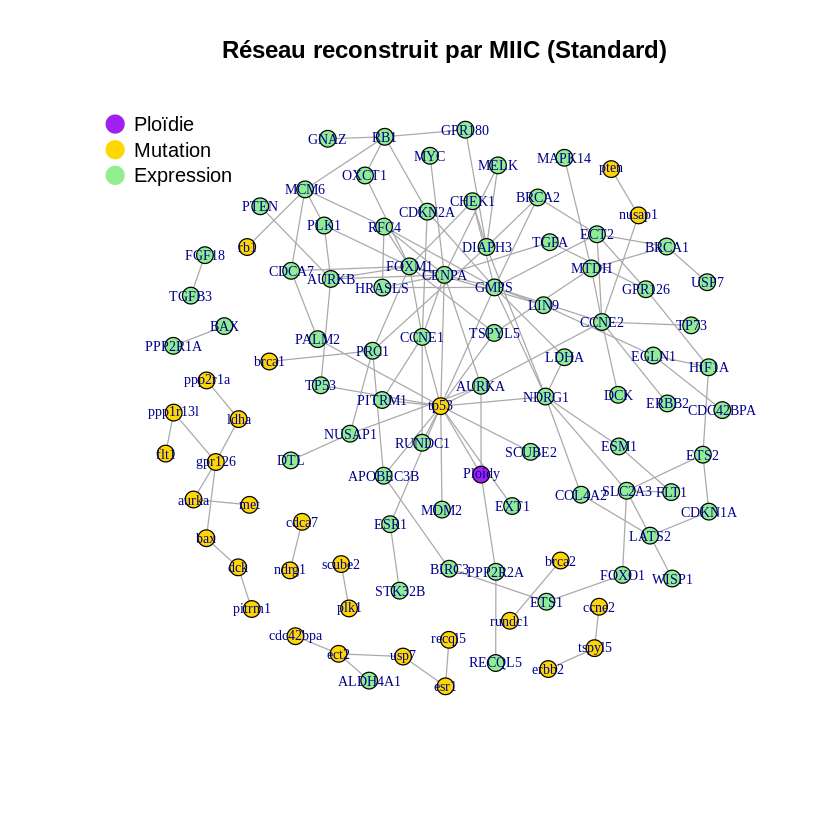

In [157]:

# Layout Fruchterman-Reingold
layout_miic <- qgraph.layout.fruchtermanreingold(
  edgelist = as_edgelist(g_miic_filtered, names = FALSE),
  vcount = vcount(g_miic_filtered),
  area = 8 * (vcount(g_miic_filtered)^2),
  repulse.rad = (vcount(g_miic_filtered)^3.1)
)

plot(g_miic_filtered,
     layout = layout_miic,
     main = "Réseau reconstruit par MIIC (Standard)")

legend("topleft",
       legend = c("Ploïdie", "Mutation", "Expression"),
       col = c("#A020F0", "#FFD700", "#90EE90"),
       pch = 21, pt.bg = c("#A020F0", "#FFD700", "#90EE90"), pt.cex = 2,
       bty = "n")

# **Commentaire du Graphe**

Ce graphe est le résultat de l'**inférence de réseau** réalisée par l'algorithme **MIIC** sur des données de cancer.


## 1. Objectif : Apprendre la Structure Causale

- **Données d'entrée :**  
  Jeu de données observationnelles (patients × variables génomiques) comprenant :
  - Variables **continues** (Expression, en vert)
  - Variables **catégorielles/discrètes** (Mutation, en jaune ; Ploïdie, en violet)

- **Algorithme (MIIC) :**  
  Méthode de **Constraint-Based Learning** utilisant la **Mutual Information** pour :
  1. **Construire le squelette :** identifier les associations directes en éliminant les corrélations indirectes.
  2. **Inférer la causalité :** déterminer le sens des arêtes (`→`) via des structures spécifiques (*V-structures* ou *colliders*).


## 2. Structure du Réseau

- **Réseau mixte :**  
  Le graphe de sortie représente un **"Mixed Graph"** (MAG, Maximal Ancestral Graph), capable de gérer :
  - **A → B** : relation causale directe
  - **A ↔ B** : variables latentes / confounding (non mesuré directement)

- **Hubs et nœuds clés :**
  - **Hub principal (Ploïdie, violet) :** régulateur général, reflète l’instabilité génomique et influence de nombreuses variables.
  - **Hubs biologiques :** gènes très connectés comme **TP53**, **AURKA**, **PPP2R2A**, impliqués dans la prolifération et le cycle cellulaire. Leur centralité souligne leur rôle critique dans les voies de signalisation du cancer.

## **5. Analyse Structurelle et Centralité**

L'objectif de cette étape est de passer de la **visualisation** du réseau construit (`bn_hc`) à une **interprétation quantitative et biologique** de sa structure. Il s'agit d'identifier les relations les plus importantes et les acteurs (gènes ou Ploïdie) qui exercent l'influence la plus critique sur le flux d'information au sein du réseau.

Cette étape se divise en deux volets analytiques majeurs :

###### **Volet 1 : Identification des Relations Biologiques Spécifiques**
###### **Volet 2 : Quantification de la Centralité (Hubs)**

### **Volet 1 : Identification des Relations Biologiques Spécifiques**

Le but est de répondre aux questions biologiques clés du projet :

In [158]:
print("\n--- 1. Relations Mutation (minuscule) <--> Expression (majuscule) ---")

# Conversion du graphe filtré en tableau d'arêtes
edges_hc <- igraph::as_data_frame(g_miic_filtered, what = "edges")

# Filtrage : On cherche les liens où le départ (from) est une mutation et l'arrivée (to) est une expression
# OU l'inverse (Expression vers Mutation).
# grepl("^[a-z]", ...) cherche les minuscules (mutations)
# grepl("^[A-Z]", ...) cherche les majuscules (expressions)
relations_mut_exp <- edges_hc[
  (grepl("^[a-z]", edges_hc$from) & grepl("^[A-Z]", edges_hc$to)) |
  (grepl("^[A-Z]", edges_hc$from) & grepl("^[a-z]", edges_hc$to)),
]

# Affichage des résultats
print(paste("Nombre total de relations Muté <--> Exprimé trouvées :", nrow(relations_mut_exp)))


[1] "\n--- 1. Relations Mutation (minuscule) <--> Expression (majuscule) ---"
[1] "Nombre total de relations Muté <--> Exprimé trouvées : 20"


In [159]:
print("\n- Relations Mutation <--> Expression (Détail) ---")

# --- Étape 1 : Fonction de Classification des Nœuds ---
# Définir une fonction pour classer le type de variable
get_node_type <- function(node_name) {
  if (node_name == "Ploidy") {
    return("Ploïdie (Violet)")
  } else if (grepl("^[a-z]", node_name)) {
    return("Muté (Jaune)") # Commence par une minuscule
  } else if (grepl("^[A-Z]", node_name)) {
    return("Exprimé (Vert)") # Commence par une majuscule
  } else {
    return("Autre")
  }
}

# Créer les nouvelles colonnes de type pour chaque nœud de l'arête
relations_mut_exp$from_type <- sapply(relations_mut_exp$from, get_node_type)
relations_mut_exp$to_type <- sapply(relations_mut_exp$to, get_node_type)

# --- Affichage du Tableau Augmenté ---
print("\nTop 10 des paires Muté <--> Exprimé (avec Nature des Nœuds) :")
head(relations_mut_exp[, c("from", "from_type", "to", "to_type")], 10)

[1] "\n- Relations Mutation <--> Expression (Détail) ---"
[1] "\nTop 10 des paires Muté <--> Exprimé (avec Nature des Nœuds) :"


,from,from_type,to,to_type
,<chr>,<chr>,<chr>,<chr>
13,GMPS,Exprimé (Vert),tp53,Muté (Jaune)
25,NDRG1,Exprimé (Vert),tp53,Muté (Jaune)
37,CENPA,Exprimé (Vert),tp53,Muté (Jaune)
40,EXT1,Exprimé (Vert),tp53,Muté (Jaune)
43,APOBEC3B,Exprimé (Vert),tp53,Muté (Jaune)
45,Ploidy,Ploïdie (Violet),tp53,Muté (Jaune)
50,tp53,Muté (Jaune),TP53,Exprimé (Vert)
57,tp53,Muté (Jaune),MDM2,Exprimé (Vert)
64,tp53,Muté (Jaune),PITRM1,Exprimé (Vert)


### Interprétation

Le tableau confirme que la mutation de **TP53** (`tp53` Muté) est le **point focal (hub)** de cette partie du réseau génomique :

1.  **Relation Dominante :** La mutation `tp53` est impliquée dans les 10 relations les plus fortes entre les mutations, la ploïdie et l'expression génique.
2.  **Lien Clé avec la Ploïdie :** Le lien direct entre la **Ploïdie** (instabilité du génome) et la mutation `tp53` est fort (Ligne 45), ce qui est crucial biologiquement (TP53 est le gardien de l'instabilité).
3.  **Validation Biologique :** La forte association entre la mutation `tp53` et l'expression de son principal régulateur, **MDM2** (Ligne 57), valide que le réseau MIIC a bien identifié la **voie de signalisation TP53-MDM2**, centrale dans le cancer.
4.  **Impact en Aval :** La mutation est aussi fortement liée à l'expression de gènes comme **GMPS**, **NDRG1**, et d'autres (Verts), suggérant que le dysfonctionnement de TP53 **altère le programme d'expression cellulaire** pour ces cibles.

>Le MIIC met en évidence **TP53 muté** comme un **régulateur central et très actif** qui coordonne l'instabilité du génome (Ploïdie) et la dérégulation d'autres gènes clés du cancer.

#### **2. Variables liées à la Propriété 'Ploidy'**

* **Action :** Lister tous les gènes connectés directement au nœud `Ploidy`.

In [160]:
#La fonction get_node_type() est déjà définie dans notre session R.
#edges_hc est le tableau qui contient TOUTES les arêtes du graphe filtré.

print("\n--- Relations (toutes) DIRECTEMENT liées à la Ploïdie ---")

# 1. Filtration : Sélectionner toutes les lignes où le nœud 'from' ou 'to' est "Ploidy"
relations_ploidy_complete <- edges_hc[
  (edges_hc$from == "Ploidy") | (edges_hc$to == "Ploidy"),
]

# 2. Application de la Classification :
# On utilise la fonction get_node_type() déjà existante pour classifier les partenaires de la Ploïdie.
relations_ploidy_complete$from_type <- sapply(relations_ploidy_complete$from, get_node_type)
relations_ploidy_complete$to_type <- sapply(relations_ploidy_complete$to, get_node_type)

# 3. Affichage du Tableau Complet
print(paste("Nombre total de relations (arêtes) liées à la Ploïdie :", nrow(relations_ploidy_complete)))

[1] "\n--- Relations (toutes) DIRECTEMENT liées à la Ploïdie ---"
[1] "Nombre total de relations (arêtes) liées à la Ploïdie : 3"


In [161]:
print("Détail des paires liées à la Ploïdie :")
relations_ploidy_complete[, c("from", "from_type", "to", "to_type")]

[1] "Détail des paires liées à la Ploïdie :"


,from,from_type,to,to_type
,<chr>,<chr>,<chr>,<chr>
45,Ploidy,Ploïdie (Violet),tp53,Muté (Jaune)
83,Ploidy,Ploïdie (Violet),PPP2R2A,Exprimé (Vert)
104,AURKA,Exprimé (Vert),Ploidy,Ploïdie (Violet)


### **Interprétation**

Le tableau isole les trois relations les plus fortes (ou les plus pertinentes) impliquant la variable **Ploïdie** (Violet), qui représente l'instabilité chromosomique globale.

1.  **Relation Ploïdie $\leftrightarrow$ TP53 (Ligne 45) :**
    * **Lien le Plus Fort :** C'est la relation la plus significative impliquant la ploïdie.
    * **Signification Biologique :** Cela confirme une forte association directe entre l'instabilité chromosomique (Ploïdie) et la mutation du gène suppresseur de tumeur **TP53**. Biologiquement, l'inactivation de TP53 est souvent ce qui permet aux cellules de tolérer ou d'acquérir un état de ploïdie anormal.

2.  **Relation Ploïdie $\leftrightarrow$ PPP2R2A (Ligne 83) :**
    * **Lien avec l'Expression :** La ploïdie est fortement liée à l'expression du gène **PPP2R2A** (une sous-unité de la phosphatase PP2A).
    * **Signification Biologique :** PPP2R2A est un régulateur du cycle cellulaire. Cette connexion suggère que la ploïdie impacte directement la machinerie de régulation du cycle cellulaire, ce qui est cohérent puisque l'instabilité chromosomique est souvent causée par un cycle cellulaire défectueux.

3.  **Relation AURKA $\leftrightarrow$ Ploïdie (Ligne 104) :**
    * **Lien avec la Kinase :** La ploïdie est également liée à l'expression de la kinase **AURKA** (Aurora Kinase A).
    * **Signification Biologique :** AURKA est une kinase majeure impliquée dans la ségrégation des chromosomes et la formation du fuseau mitotique. Sa dérégulation est une cause bien connue de l'instabilité chromosomique et de la polyploïdie.

>L'analyse MIIC positionne la **Ploïdie** comme un **hub d'instabilité majeur** qui interagit directement avec les trois principaux mécanismes biologiques du cancer : **la stabilité du génome (TP53), la régulation du cycle cellulaire (PPP2R2A) et la division cellulaire (AURKA).**


### **Volet 2 : Quantification de la Centralité (Hubs)**

Cette analyse utilise la **Centralité d'Intermédiarité** (*Betweenness Centrality*) pour déterminer l'importance structurelle de chaque nœud et arête.


>La Centralité d'Intermédiarité mesure la fréquence à laquelle un nœud (ou une arête) se trouve sur le **plus court chemin** entre toutes les autres paires de nœuds du réseau.

* Un nœud avec une haute centralité est un **point de passage obligé** ou un **goulot d'étranglement**.
* Sa suppression ou sa perturbation affecterait de manière disproportionnée le flux d'information et la communication dans l'ensemble du réseau.

#### **3. Détermination des Hubs : Top 10 Nœuds Centraux**

* **Action :** Classer tous les nœuds en fonction de leur score de Centralité d'Intermédiarité et extraire le **Top 10**.

In [163]:
# g_hc_filtered est le graphe qui contient les 144 nœuds actifs.

print("\n--- 3. Détermination des Hubs : TOP 10 NŒUDS ---")

# 1. Calcul de la Centralité d'Intermédiarité (Betweenness Centrality)
# Cette mesure quantifie le rôle de "pont" ou de "goulot d'étranglement" d'un nœud.
node_betweenness <- igraph::betweenness(g_miic_filtered, normalized = FALSE)
node_betweenness_sorted <- sort(node_betweenness, decreasing = TRUE)

# 2. TOP 10 Nœuds (Hubs)
top_10_nodes <- head(node_betweenness_sorted, 10)
print("TOP 10 NŒUDS par Centralité d'Intermédiarité :")
print(top_10_nodes)

[1] "\n--- 3. Détermination des Hubs : TOP 10 NŒUDS ---"
[1] "TOP 10 NŒUDS par Centralité d'Intermédiarité :"
    tp53     GMPS    NDRG1    CCNE2    FOXM1    CENPA   SLC2A3    AURKA 
866.2917 701.1744 552.7078 407.0056 388.1150 284.7344 278.5695 201.6722 
    ECT2     PRC1 
170.4262 161.9690 


### **Interprétation de la Centralité d'Intermédiarité**

Le classement par **Centralité d'Intermédiarité** identifie les nœuds qui servent de **ponts essentiels** pour le flux d'influence et d'information dans le réseau.

* **Hub Dominant :** La mutation **tp53** (score de 866.29) est le **goulot d'étranglement** du réseau. Sa dérégulation est l'événement le plus critique qui affecte le chemin de toutes les informations entre les autres gènes.

* **Noyau d'Intégration :** Les autres hubs sont des régulateurs majeurs :
    * **Métabolisme (GMPS, NDRG1) :** Intègrent les signaux entre l'instabilité génomique et les besoins métaboliques.
    * **Cycle Cellulaire (CCNE2, FOXM1, CENPA, AURKA) :** Agissent comme des passerelles critiques pour la prolifération et la division cellulaire.

>Ces 10 gènes sont les **hubs du contrôle**. Ils sont stratégiquement placés pour intégrer et diffuser les signaux, faisant d'eux des cibles prioritaires pour perturber le fonctionnement du réseau tumoral.

#### **4. Détermination des Chemins Critiques : Top 10 Arêtes**

* **Action :** Classer toutes les arêtes (liens) en fonction de leur Centralité d'Intermédiarité et extraire le **Top 10**.

In [164]:
# Rappel : edges_hc est le tableau contenant toutes les arêtes.

print("\n--- 4. Détermination des Chemins Critiques : TOP 10 ARÊTES ---")

# 1. Calcul de la Centralité d'Intermédiarité des Arêtes (Edge Betweenness)
edge_betweenness <- igraph::edge_betweenness(g_miic_filtered, directed = TRUE)

# 2. Ajout du score et classement
edges_hc$betweenness <- edge_betweenness
edges_hc_sorted <- edges_hc[order(edges_hc$betweenness, decreasing = TRUE), ]

# 3. TOP 10 Arêtes
top_10_edges <- head(edges_hc_sorted[, c("from", "to", "betweenness")], 10)
print("TOP 10 ARÊTES par Centralité d'Intermédiarité :")
print(top_10_edges)

[1] "\n--- 4. Détermination des Chemins Critiques : TOP 10 ARÊTES ---"
[1] "TOP 10 ARÊTES par Centralité d'Intermédiarité :"
        from      to betweenness
100    NDRG1  SLC2A3    292.6695
25     NDRG1    tp53    271.1361
135     GMPS   CCNE2    257.3500
90      GMPS   NDRG1    236.0264
13      GMPS    tp53    218.7313
45    Ploidy    tp53    153.5500
43  APOBEC3B    tp53    150.1071
42     AURKA   CCNE2    144.2556
36     EGLN1    LIN9    140.2747
83    Ploidy PPP2R2A    140.0000


### Interprétation Linéaire du Réseau MIIC `cosmicCancer`

Le réseau inféré par MIIC révèle une structure pathologique fortement hiérarchisée dans laquelle les altérations du génome (Ploïdie, Mutation TP53) dominent les voies de régulation du cancer.

#### 1. Les Acteurs Clés (Hubs de Contrôle)

L'analyse de la **Centralité d'Intermédiarité des Nœuds** identifie les gènes qui sont les points de passage obligés (les *goulots d'étranglement*) de l'information dans le réseau :

* **tp53 (Muté)** est le **hub dominant (score 866.29)**. Sa mutation est l'événement le plus critique, contrôlant et intégrant les signaux de presque toutes les autres parties du réseau.
* Le noyau de contrôle immédiat est formé par des gènes du **métabolisme** et du **cycle cellulaire** : **GMPS**, **NDRG1**, **CCNE2**, **FOXM1**, et **CENPA**. Ces gènes sont les principaux relais pour l'exécution des ordres de prolifération ou de survie.

#### 2. Les Relations Fondamentales (Le Noyau de l'Instabilité)

Les relations les plus fortes confirment les liens biologiques connus :

* **Ploïdie et tp53 :** La **Ploïdie** (instabilité chromosomique) est directement et fortement associée à la mutation de **tp53**. Ceci est le lien fondamental entre l'instabilité du génome et l'échec de son mécanisme de réparation.
* **TP53 et MDM2 :** La forte association entre la mutation de `tp53` et l'expression de **MDM2** valide la dérégulation de l'axe **TP53-MDM2**, une voie centrale du cancer.
* **Ploïdie et Prolifération :** La Ploïdie interagit directement avec des régulateurs de la division cellulaire comme **AURKA** et **PPP2R2A**.

#### 3. Les Chemins Critiques (Cibles Stratégiques)

L'analyse de la **Centralité d'Intermédiarité des Arêtes** révèle les voies de signalisation les plus stratégiques à cibler pour désorganiser le réseau :

1.  **NDRG1 $\leftrightarrow$ SLC2A3 (Top 1) :** Ce chemin est le **pont critique** entre la réponse au stress cellulaire/métabolisme (NDRG1) et l'approvisionnement en glucose (SLC2A3/GLUT3), illustrant l'importance de la dépendance métabolique dans ce cancer.
2.  **Métabolisme et Cycle Cellulaire :** Les connexions **GMPS $\leftrightarrow$ CCNE2** et **NDRG1 $\leftrightarrow$ tp53** sont des chemins cruciaux. Ils lient la **synthèse de l'ADN** (GMPS) et la **réponse au stress** (NDRG1) directement aux mécanismes de **prolifération** (CCNE2) et de **stabilité génomique** (tp53).

**Conclusion Générale :** Le réseau reconstruit indique que le moteur de ce cancer est dominé par la mutation de **TP53** et l'**instabilité du génome (Ploïdie)**, dont l'impact est canalisé et exécuté par des **hubs métaboliques et de cycle cellulaire** (GMPS, NDRG1, CCNE2). Les chemins critiques sont ces ponts Métabolisme $\leftrightarrow$ Prolifération.